In [ ]:
# Practice some operation
import torch
x = torch.rand(5,3)
print("Matrix(5, 3): ",x)

Matrix(5, 3):  tensor([[0.3360, 0.1994, 0.9086],
        [0.0790, 0.6608, 0.9114],
        [0.4799, 0.0351, 0.2629],
        [0.5490, 0.8989, 0.6290],
        [0.7269, 0.4993, 0.2541]])


In [ ]:
print(x.size())
print(x.shape)

torch.Size([5, 3])
torch.Size([5, 3])


In [ ]:
print(x.dtype)

x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

print(x.dtype)

torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)
torch.float16


In [ ]:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1, 2)

print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([8, 2])


In [ ]:
# Started From Here

**torch.nn** is a module in PyTorch that provides tools for building neural networks. It includes a wide variety of **pre-built layers, loss functions, and activation functions** that can be used to create and train deep learning models for a wide range of tasks.



In [ ]:
import torch
import torch.nn as nn


In [ ]:
def forward(x):
    return w * x

A **tensor** is a multi-dimensional array or matrix of 
numerical values,

typically used to represent data or model parameters in a neural network. 

**torch.tensor()** is a function in the PyTorch library that creates a new tensor object from an existing data source such as a list, tuple, or numpy array.

In [ ]:
x = torch.tensor([[1],[2],[3],[4],[5],[6],[7],[8]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8],[10],[12],[14],[16]], dtype=torch.float32)


In [ ]:
n_sample, n_features = x.shape
print(f'n_sample = {n_sample}, n_features={n_features}')

n_sample = 8, n_features=1


In [ ]:
# tried by using 5 as input the answer is 10, let's see what we get
x_test = torch.tensor([5], dtype=torch.float32)

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()

    # define different layer
    self.lin = nn.Linear(input_dim, output_dim)

  # here apply th layers
  def forward(self, x):
    return self.lin(x)

# want only 1 output for linear regression  
input_size , output_size = n_features, n_features

# create a model instance
model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f{x_test.item()}) = {model(x_test).item():.3f}')

learning_rate = 0.01
n_epochs = 100

# Define Loss
loss = nn.MSELoss()

# Define Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#training loop
for epoch in range(n_epochs):
  # predict = forward pass with our loop
  y_predicted = model(x) # call the model that internally call forward function

  # loss
  l = loss(y, y_predicted)  # actual value and the predicted value for calculating loss

  # calculate gardient = backward pass
  l.backward()

  # update weight
  optimizer.step() 

  # zero the gradient after updating the weights
  optimizer.zero_grad()

  if(epoch+1)%10 == 0:
    w, b = model.parameters() 
    print('epoch: ', epoch+1, ':w = ',w[0][0].item(), 'Loss = ',l.item())

print(f'Prediction after training: f({x_test.item()}) =  {model(x_test).item():.3f}')

Prediction before training: f5.0) = 2.280
epoch:  10 :w =  1.8377293348312378 Loss =  0.17103856801986694
epoch:  20 :w =  1.8449232578277588 Loss =  0.15780389308929443
epoch:  30 :w =  1.8510048389434814 Loss =  0.14567053318023682
epoch:  40 :w =  1.8568475246429443 Loss =  0.13446994125843048
epoch:  50 :w =  1.862460970878601 Loss =  0.12413057684898376
epoch:  60 :w =  1.8678544759750366 Loss =  0.11458618193864822
epoch:  70 :w =  1.8730363845825195 Loss =  0.10577566921710968
epoch:  80 :w =  1.8780150413513184 Loss =  0.09764264523983002
epoch:  90 :w =  1.8827985525131226 Loss =  0.09013496339321136
epoch:  100 :w =  1.8873944282531738 Loss =  0.0832044780254364
Prediction after training: f(5.0) =  10.070


## **First Neural Network**

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [ ]:
# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Hyper-parameter
input_size = 784
hidden_size = 500
num_classes = 10 # because we have 10 different digits
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [ ]:
# MNIST Dataset
# Torchvision, provides tools and utilities for working with computer vision tasks. 
train_ds = torchvision.datasets.MNIST(root='./data',
                                      train = True,
                                      transform = transforms.ToTensor(),
                                      download = True)
# transforms.ToTensor()-
# It converts a PIL Image or numpy array to a PyTorch tensor. Specifically, 
# it converts the input image or array to a float tensor with pixel values in the range [0, 1].

test_ds = torchvision.datasets.MNIST(root='./data',
                                      train = False,
                                      transform = transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Data Loader - helps to load and iterate through a dataset in a batched manner.
# It provides an easy way to create a Python iterator over a dataset,
# which can be used to train a model in mini-batches.
train_loader = torch.utils.data.DataLoader(dataset = train_ds,
                                           batch_size = batch_size,
                                           shuffle = True)
# shuffle - This can help to improve the generalization ability of the model and prevent overfitting.
test_loader = torch.utils.data.DataLoader(dataset = test_ds,
                                          batch_size = batch_size,
                                          shuffle = False)

In [ ]:
examples = iter(test_loader)
example_data, example_targets = next(examples)

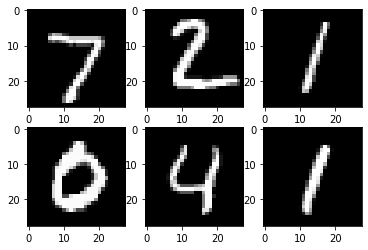

In [ ]:
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(example_data[i][0], cmap = 'gray')
plt.show()

In [ ]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)

    # No activation and no softmax at the end
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# Train the model 
n_total_steps = len(train_loader)

# 1st for loop = iterates over the number of epoch that we specify
# 2nd for loop = iterates over the training loader
for epoch in range(num_epochs):  
  for i, (images, labels) in enumerate(train_loader):
    # origin shape: [100, 1, 28, 28]
    # resized: [100, 784]
    # pushing to device because i want to use gpu here
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # Forward pass and loss calculation
    outputs = model(images)
    loss = criterion(outputs, labels)


    # Backward and optimize
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()

    if (i+1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')



Epoch [1/2], Step [100/600], Loss: 0.3805
Epoch [1/2], Step [200/600], Loss: 0.2859
Epoch [1/2], Step [300/600], Loss: 0.2444
Epoch [1/2], Step [400/600], Loss: 0.1898
Epoch [1/2], Step [500/600], Loss: 0.1466
Epoch [1/2], Step [600/600], Loss: 0.1296
Epoch [2/2], Step [100/600], Loss: 0.1768
Epoch [2/2], Step [200/600], Loss: 0.1171
Epoch [2/2], Step [300/600], Loss: 0.1638
Epoch [2/2], Step [400/600], Loss: 0.0741
Epoch [2/2], Step [500/600], Loss: 0.0324
Epoch [2/2], Step [600/600], Loss: 0.1307


In [ ]:
# Test the model: we don't need to compute gradients
with torch.no_grad():
  n_correct = 0
  n_samples = len(test_loader.dataset)

  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # max return (output_value, index)
    _, predicted = torch.max(outputs, 1)
   # print(predicted)
    n_correct += (predicted == labels).sum().item()
  #  print(n_correct)

  acc = n_correct/n_samples
  print(f'Accuracy of the network on the {n_samples} test images: {100*acc} %')

Accuracy of the network on the 10000 test images: 97.05 %
